In [4]:
import numpy as np
import pandas as pd
import custom_EDA # 요약정보 출력 겸 전처리용 라이브러리

# 1-1. 데이터 확보 및 점검
df = pd.read_csv("./Urea data.csv") # 공공데이터포털 요소수 재고현황(2021년 기준)
custom_EDA.summary_info(df)

,feature,type,null,unique,sample1,sample2,sample3
0,addr,object,0,200,경기 광명시 오리로 608 (소하동),경기 화성시 남양읍 시청로 270,경기 의왕시 경수대로 112 (왕곡동)
1,code,object,0,200,A0000004,A0002367,A0008224
2,color,object,0,4,GREEN,YELLOW,GREEN
3,inventory,int64,0,151,1700,900,2067
4,lat,float64,0,200,37.456201,37.192335,37.337753
5,lng,float64,0,200,126.880407,126.8386,126.980311
6,name,object,0,199,(주)지에스이앤알 직영 하안단지주유소,산들주유소,지지대셀프주유소
7,openTime,object,187,11,NaN,NaN,NaN
8,price,int64,0,15,2000,2000,2200
9,regDt,object,0,199,2021-12-28 10:23:15,2021-12-28 12:01:11,2021-12-28 14:46:49


In [2]:
# 1-2. 결측치 - openTime, 187개 null
  # 오픈시간은 유의미하지 못하다고 판단, 삭제
df.drop('openTime', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   addr       200 non-null    object 
 1   code       200 non-null    object 
 2   color      200 non-null    object 
 3   inventory  200 non-null    int64  
 4   lat        200 non-null    float64
 5   lng        200 non-null    float64
 6   name       200 non-null    object 
 7   openTime   13 non-null     object 
 8   price      200 non-null    int64  
 9   regDt      200 non-null    object 
 10  tel        200 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 17.3+ KB


In [104]:
# 1-3. 이상치 점검
df.describe() # 재고량, 가격 외에도 수치로 이뤄진 위, 경도가 함께 나옴

# 재고량 최소값 0, 전국 9곳 > 오류 같아 보이진 않음
df_zero = df[df['inventory']==0]

,inventory,lat,lng,price
count,200.000000,200.000000,200.000000,200.000000
mean,1371.315000,37.225830,127.082005,1738.500000
std,1038.210741,0.447606,0.388876,350.545519
min,0.000000,34.595037,126.575722,1000.000000
25%,700.000000,37.077245,126.809875,1500.000000
50%,1181.000000,37.246144,127.055689,1800.000000
75%,1762.000000,37.451485,127.258748,2000.000000
max,6900.000000,38.189376,129.366307,3000.000000


In [19]:
# 2. 데이터 기초 분석
import matplotlib.pyplot as plt
import seaborn as sns

# 2-1. 지역별 쪼개기
df['sido'] = df['addr'].apply(lambda x: x.split(' ')[0].strip())
df['sido'].value_counts() 

sido
경기       144
인천        25
충남        10
경기도        6
전북         3
충북         3
경북         2
평택시        2
부산         1
서울         1
인천광역시      1
강원         1
전남         1
Name: count, dtype: int64

In [ ]:
# 오류난 중복 데이터 정리 > 경기가 152곳, 인천 26곳.. 사실상 수도권 집중
df.loc[df['sido'] == '경기도', 'sido'] = '경기'
df.loc[df['sido'] == '인천광역시', 'sido'] = '인천'
df.loc[df['sido'] == '평택시', 'sido'] = '경기'

Text(0, 0.5, 'count')

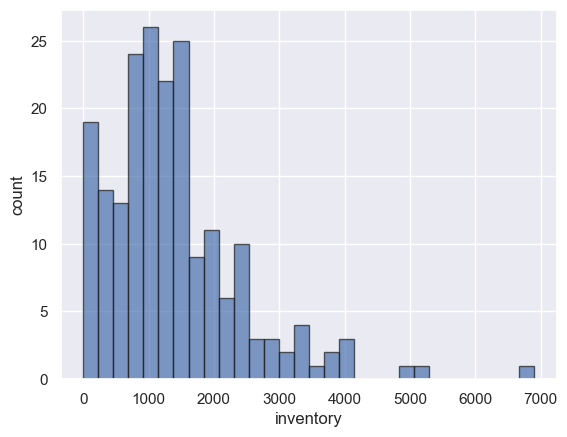

In [60]:
# 2-2. 재고량 분포도 살펴보기
 # 히스토그램
fig, ax = plt.subplots()
ax.hist(df['inventory'], bins=30, edgecolor='k', alpha=0.7)
ax.set_xlabel('inventory')
ax.set_ylabel('count')

요소수 재고량의 평균은 1371.315개입니다.


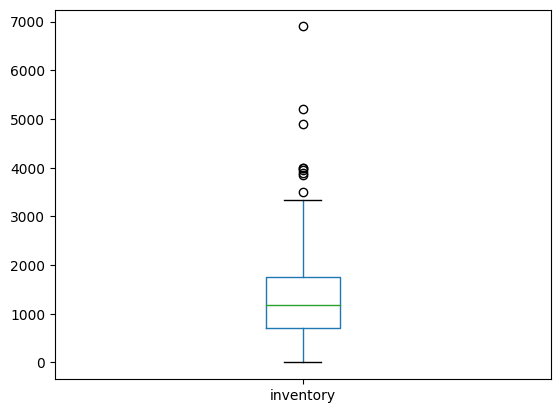

In [25]:
# 박스플롯
df.boxplot(column='inventory', grid=False)

# 평균값 계산
inven_mean = df['inventory'].mean() 
print(f"요소수 재고량의 평균은 {inven_mean}개입니다.")

C:\Users\kakoo\AppData\Local\Temp\ipykernel_5780\3974456822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='color', data=df,


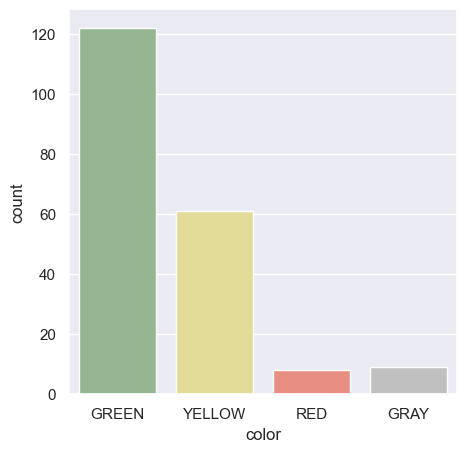

In [38]:
# 재고현황을 4개 구간으로 나눠보기 / 초노빨회 '#8FBC8B', '#F0E68C', '#FA8072', '#C0C0C0'\
  # hue를 사용하란 경고가 뜨나, 사용시 색깔 순서가 바뀜
plt.figure(figsize=(5, 5))
sns.set(style='darkgrid')
ax = sns.countplot(x='color', data=df,
                   palette=['#8FBC8B', '#F0E68C', '#FA8072', '#C0C0C0'], 
                   order=['GREEN', 'YELLOW', 'RED', 'GRAY'], legend=False) 

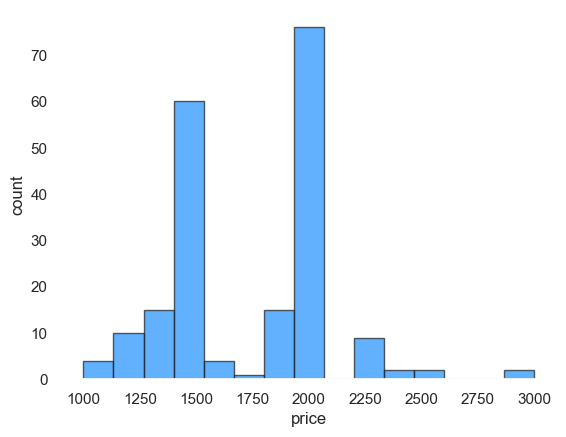

In [67]:
# 2-3. 가격 분포도 살펴보기
 # 히스토그램
fig, ax = plt.subplots()
ax.hist(df['price'], bins=15, edgecolor='k', color='#1E90FF', alpha=0.7) # 스카이블루
ax.set_xlabel('price')
ax.set_ylabel('count')
ax.set_facecolor('white')

요소수 가격의 평균은 1738.5원입니다.


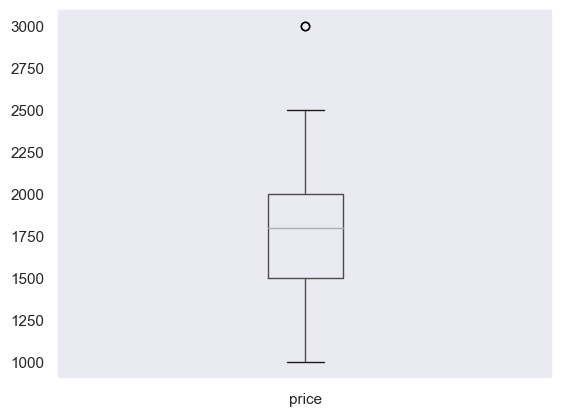

In [49]:
# 박스플롯으로 가격 확인
df.boxplot(column='price', grid=False) 

# 평균값 계산
price_mean = df['price'].mean() 
print(f"요소수 가격의 평균은 {price_mean:.1f}원입니다.")

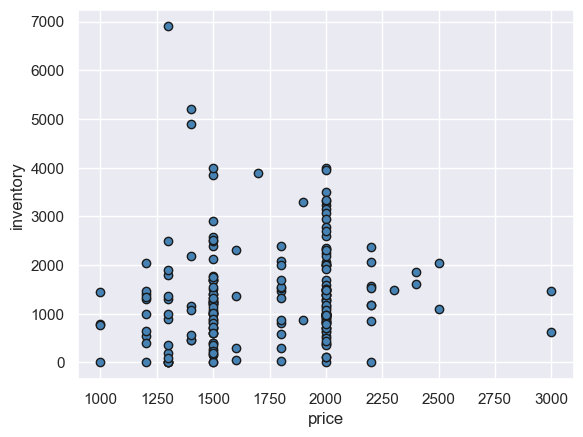

In [75]:
# 2-4. 요소수와 가격간 상관관계 확인
fig, ax = plt.subplots()
ax.scatter(df['price'], df['inventory'], color='#4682B4', edgecolors='k')
ax.set_xlabel('price')
ax.set_ylabel('inventory')
plt.show()

In [79]:
# 상관관계 확인, 수치형 컬럼 추출
numeric_df = df[['inventory', 'price']]

corr = numeric_df.corr(method='pearson').loc['inventory', 'price']
print(f"가격과 재고량 사이의 피어슨 상관계수는 {corr:.3f}입니다.")

가격과 재고량 사이의 피어슨 상관계수는 0.099입니다.


In [81]:
# 2-5. 주유소 유형별 현황 살펴보기
  # 휴게소, 셀프, 알뜰

# 가격 차이 도출
def price_insight(keyword, diff):
    if diff > 0:  print(f"{keyword} 주유소의 요소수 가격은 전체 평균에 비해 {diff:.2f}원 저렴합니다.")
    else: print(f"{keyword} 주유소의 요소수 가격은 전체 평균에 비해 {-diff:.2f}원 비쌉니다.")

# 재고 차이 도출
def inven_insight(keyword, diff):
    if diff > 0:  print(f"{keyword} 주유소의 요소수 재고량은 전체 평균에 비해 {diff:.2f}만큼 적습니다.")
    else: print(f"{keyword} 주유소의 요소수 재고량은 전체 평균에 비해 {-diff:.2f}만큼 많습니다.")    

In [87]:
# 2-5-1. 휴게소 주유소
hw_df = df[df.name.str.contains('휴게소')]
print(f"휴게소 추측 주유소 수: {hw_df.shape[0]}")

# 전체 평균과의 차이 도출
price_diff = df.price.mean() - hw_df.price.mean()
inven_diff = df.inventory.mean() - hw_df.inventory.mean() 

price_insight("휴게소", price_diff)
inven_insight("휴게소", inven_diff)

휴게소 추측 주유소 수: 3
휴게소 주유소의 요소수 가격은 전체 평균에 비해 571.83원 저렴합니다.
휴게소 주유소의 요소수 재고량은 전체 평균에 비해 853.65만큼 적습니다.


In [91]:
# 2-5-2. 셀프 주유소
sf_df = df[df.name.str.contains('셀프')]
print(f"셀프 주유소 수: {sf_df.shape[0]}")

# 전체 평균과의 차이 도출
price_diff = df.price.mean() - sf_df.price.mean()
inven_diff = df.inventory.mean() - sf_df.inventory.mean() 

price_insight("셀프", price_diff)
inven_insight("셀프", inven_diff)

셀프 주유소 수: 15
셀프 주유소의 요소수 가격은 전체 평균에 비해 208.17원 비쌉니다.
셀프 주유소의 요소수 재고량은 전체 평균에 비해 121.88만큼 많습니다.


In [93]:
# 2-5-3. 알뜰 주유소
a_df = df[df.name.str.contains('알뜰')]
print(f"알뜰 주유소 수: {a_df.shape[0]}")

# 전체 평균과의 차이 도출
price_diff = df.price.mean() - a_df.price.mean()
inven_diff = df.inventory.mean() - a_df.inventory.mean() 

price_insight("알뜰", price_diff)
inven_insight("알뜰", inven_diff)


알뜰 주유소 수: 3
알뜰 주유소의 요소수 가격은 전체 평균에 비해 238.50원 저렴합니다.
알뜰 주유소의 요소수 재고량은 전체 평균에 비해 850.02만큼 많습니다.


In [97]:
# 3. 주유소별 요소수 재고 현황 시각화
  # 지도 표현할 내용, 주유소 명칭과 주소 재고량, 전화번호
import folium

In [102]:
# 3-1. 추출 원하는 지역 정보
 # 타겟 지역명 target_region, 변경 가능
target_region = '경기'
df_target_region = df[df['sido']== target_region]

# 3-2. 재고 정보 마커 시각화
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=9) # 서울 중심지인 '중구' 좌표

for i in df_target_region.values:
    iframe = "<b>    명칭 : </b>"+str(i[6])+"<br>"+"<b>     주소 : </b>"+i[0]+"<br>"+"<b> 재고량 : </b>"+str(i[3])+"<br>"+"<b> 전화번호 : </b>"+str(i[10])
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # 요소수 재고별 마커 색상 표시
    color = i[2].upper()
    if color == 'GREEN':    color_code = '#9ACD32'
    elif color == 'YELLOW': color_code = '#FFFF00'
    elif color ==  'RED':   color_code = '#DC143C'
    elif color == 'GRAY':   color_code = '#696969'
    
    # CircleMarker를 사용, 원하는 지역에 표시
    marker = folium.CircleMarker([i[4], i[5]],          # 위치
                                 radius=5,              # 범위
                                 color=color_code,      # 색상
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm

In [103]:
# 3-3. 가격 정보 마커 시각화
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=9)

for i in df_target_region.values:
    iframe = "<b>    명칭 : </b>"+str(i[6])+"<br>"+"<b>     주소 : </b>"+i[0]+"<br>"+"<b> 재고량 : </b>"+str(i[3])+"<br>"+"<b> 전화번호 : </b>"+str(i[10])
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # 요소수 가격별 마커 색상 지정/ 평균가 1700원을 고려해 세 구간 설정
    price = i[8]
    if price <= 1500:   color_code = '#f9d71c'
    elif price <= 2000: color_code = '#ff6600'
    else:   color_code = '#ff0000'
    
    # CircleMarker 사용
    marker = folium.CircleMarker([i[4], i[5]],          # 위치
                                 radius=5,              # 범위
                                 color=color_code,      # 색상
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm

In [105]:
# 3-4. 재고 상황별 시각화
target_color = 'GREEN' # 재고 여력이 충분한 주유소
df_target_color = df[df['color'].str.contains(target_color)]

# 전국으로 좌표 변경
map_osm = folium.Map(location=[36.3504, 127.3845], zoom_start=7)

for i in df_target_color.values:
    iframe = "<b>    명칭 : </b>"+str(i[6])+"<br>"+"<b>     주소 : </b>"+i[0]+"<br>"+"<b> 재고량 : </b>"+str(i[3])+"<br>"+"<b> 전화번호 : </b>"+str(i[10])
    popup = folium.Popup(iframe, min_width=300, max_width=800)
    
    # CircleMarker를 사용하여 원하는 지역에 마커를 생성합니다.
    marker = folium.CircleMarker([i[4], i[5]],          # 위치
                                 radius=5,              # 범위
                                 color='#9ACD32',       # 색상 (본 실습에서는 재고에 따라 색상을 바꾸지 않아도 괜찮습니다)
                                 fill=True,            # 마커 채우기
                                 fill_opacity=1.0,
                                 popup=popup)           # 팝업 설정
    marker.add_to(map_osm)
map_osm